Variablididad dentro de cada tópico de DMOZ respecto a valores de P@10 - GR y JS

Para cada combiación Co1 - Co7 y por cada tópico (25) se promedian los valores de las 5 corridas de la *última generación* etrenada

In [188]:
# COMBINATION
comb = 'Co3'

In [189]:
import os
import pandas as pd

# folder path


dir_path = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"


topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

df_ave_data = pd.DataFrame()

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
    for f in files:
        if "_precision_all_run.txt" in f:
            #print(f)
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
            
            # display DataFrame                                                    
            df_metric = df_metric.iloc[-100:]
            #print(df_metric)          
            

            #df_ave_data = df_metric.copy()
            df_ave_data[t] = df_metric.mean(numeric_only=True, axis=0)     

#df_ave_data['average_p@10'] = df_ave_data.mean(numeric_only=True, axis=1)         

#total_average = df_ave_data['average_p@10'].mean()
#print("MEAN AVERAGE ", total_average)

df_ave_data

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.950000,0.921,0.960,0.795,0.945,0.877,0.725000,0.953,0.867167,0.853,...,0.768000,0.908,0.950,0.773,0.966,0.620167,0.818,0.687,0.960000,0.806
1,0.945000,0.886,0.893,0.911,0.986,0.949,0.789000,0.831,0.890000,0.856,...,0.770000,0.960,0.940,0.909,0.937,0.559286,0.731,0.840,0.866000,0.879
2,0.964528,0.941,0.957,0.824,0.993,0.939,0.603500,0.863,0.966000,0.904,...,0.844000,0.942,0.961,0.916,0.945,0.470583,0.810,0.785,0.857000,0.844
3,0.965000,0.961,0.921,0.839,0.978,0.871,0.703619,0.957,0.921000,0.843,...,0.535000,0.929,0.950,0.795,0.927,0.680000,0.889,0.828,0.956000,0.667
4,0.962000,0.931,0.918,0.879,0.994,0.868,0.733603,0.899,0.952000,0.879,...,0.729056,0.916,0.968,0.874,0.902,0.779000,0.714,0.862,0.933587,0.750


In [190]:
a = df_ave_data.describe()
a

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,0.957306,0.928000,0.929800,0.84960,0.979200,0.900800,0.710944,0.900600,0.919233,0.867000,...,0.729211,0.931000,0.953800,0.853400,0.935400,0.621807,0.792400,0.80040,0.914517,0.789200
std,0.009195,0.027749,0.028385,0.04578,0.020167,0.039727,0.067826,0.055198,0.041320,0.024525,...,0.116257,0.020736,0.010872,0.065782,0.023544,0.117128,0.071087,0.06932,0.049536,0.083395
min,0.945000,0.886000,0.893000,0.79500,0.945000,0.868000,0.603500,0.831000,0.867167,0.843000,...,0.535000,0.908000,0.940000,0.773000,0.902000,0.470583,0.714000,0.68700,0.857000,0.667000
25%,0.950000,0.921000,0.918000,0.82400,0.978000,0.871000,0.703619,0.863000,0.890000,0.853000,...,0.729056,0.916000,0.950000,0.795000,0.927000,0.559286,0.731000,0.78500,0.866000,0.750000
50%,0.962000,0.931000,0.921000,0.83900,0.986000,0.877000,0.725000,0.899000,0.921000,0.856000,...,0.768000,0.929000,0.950000,0.874000,0.937000,0.620167,0.810000,0.82800,0.933587,0.806000
75%,0.964528,0.941000,0.957000,0.87900,0.993000,0.939000,0.733603,0.953000,0.952000,0.879000,...,0.770000,0.942000,0.961000,0.909000,0.945000,0.680000,0.818000,0.84000,0.956000,0.844000
max,0.965000,0.961000,0.960000,0.91100,0.994000,0.949000,0.789000,0.957000,0.966000,0.904000,...,0.844000,0.960000,0.968000,0.916000,0.966000,0.779000,0.889000,0.86200,0.960000,0.879000


Text(0.5, 0.98, 'Variability of Precision@10  - Co3')

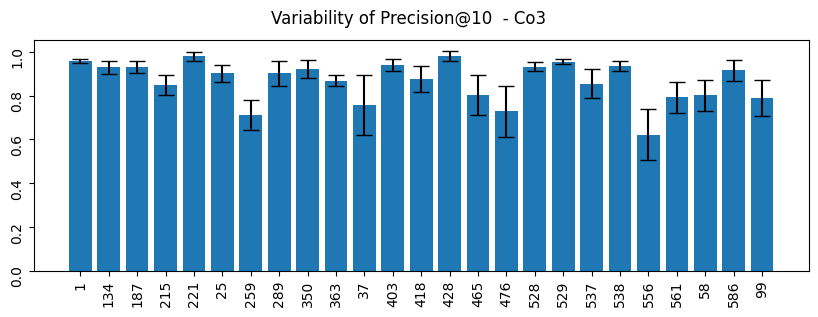

In [191]:
######### PRECISION @ 10
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar(df_ave_data.columns, df_ave_data.mean(axis=0), yerr=df_ave_data.std(), capsize=6)

fig.suptitle('Variability of Precision@10  - '+ comb)



In [192]:
stats = df_ave_data.agg(['mean', 'count', 'std'])
stats

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.957306,0.928000,0.929800,0.84960,0.979200,0.900800,0.710944,0.900600,0.919233,0.867000,...,0.729211,0.931000,0.953800,0.853400,0.935400,0.621807,0.792400,0.80040,0.914517,0.789200
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
std,0.009195,0.027749,0.028385,0.04578,0.020167,0.039727,0.067826,0.055198,0.041320,0.024525,...,0.116257,0.020736,0.010872,0.065782,0.023544,0.117128,0.071087,0.06932,0.049536,0.083395


In [193]:
t = stats.transpose()
t.iloc[0]

mean     0.957306
count    5.000000
std      0.009195
Name: 1, dtype: float64

In [194]:
import math

ci95_hi = []
ci95_lo = []
#print(t)
for i in t.index:
    m, c, s = t.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo'] = ci95_lo
t['ci95_hi'] = ci95_hi


t.rename({'mean':'mean_prec', 'count': 'runs', 'std': 'std_prec', 'ci95_lo':'ci95_lo_prec', 'ci95_hi':  'ci95_hi_prec'}, axis='columns', inplace=True)


col = t.pop('mean_prec')
t.insert(1, 'mean_prec', col)
print(t.to_latex())


df_general= t.copy()

df_general

\begin{tabular}{lrrrrr}
\toprule
{} &  runs &  mean\_prec &  std\_prec &  ci95\_lo\_prec &  ci95\_hi\_prec \\
\midrule
1   &   5.0 &   0.957306 &  0.009195 &      0.949246 &      0.965365 \\
134 &   5.0 &   0.928000 &  0.027749 &      0.903677 &      0.952323 \\
187 &   5.0 &   0.929800 &  0.028385 &      0.904920 &      0.954680 \\
215 &   5.0 &   0.849600 &  0.045780 &      0.809472 &      0.889728 \\
221 &   5.0 &   0.979200 &  0.020167 &      0.961523 &      0.996877 \\
25  &   5.0 &   0.900800 &  0.039727 &      0.865978 &      0.935622 \\
259 &   5.0 &   0.710944 &  0.067826 &      0.651492 &      0.770397 \\
289 &   5.0 &   0.900600 &  0.055198 &      0.852217 &      0.948983 \\
350 &   5.0 &   0.919233 &  0.041320 &      0.883015 &      0.955452 \\
363 &   5.0 &   0.867000 &  0.024525 &      0.845502 &      0.888498 \\
37  &   5.0 &   0.758800 &  0.137127 &      0.638603 &      0.878997 \\
403 &   5.0 &   0.938600 &  0.026102 &      0.915721 &      0.961479 \\
418 &   5.0 &   0

,runs,mean_prec,std_prec,ci95_lo_prec,ci95_hi_prec
1,5.0,0.957306,0.009195,0.949246,0.965365
134,5.0,0.928000,0.027749,0.903677,0.952323
187,5.0,0.929800,0.028385,0.904920,0.954680
215,5.0,0.849600,0.045780,0.809472,0.889728
221,5.0,0.979200,0.020167,0.961523,0.996877
25,5.0,0.900800,0.039727,0.865978,0.935622
259,5.0,0.710944,0.067826,0.651492,0.770397
289,5.0,0.900600,0.055198,0.852217,0.948983
350,5.0,0.919233,0.041320,0.883015,0.955452
363,5.0,0.867000,0.024525,0.845502,0.888498


In [195]:
dir_path = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

df_ave_data = pd.DataFrame()

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
    for f in files:
        if "_globalRecall_all_run.txt" in f:
            #print(f)
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')

            # display DataFrame                                                    
            df_metric = df_metric.iloc[-1:]   ###### ------------> ya es poblacional, me quedo con la ultima gen
            #print(df_metric)          
            

            #df_ave_data = df_metric.copy()
            df_ave_data[t] = df_metric.mean(numeric_only=True, axis=0)     

#df_ave_data['average_p@10'] = df_ave_data.mean(numeric_only=True, axis=1)         

#total_average = df_ave_data['average_p@10'].mean()
#print("MEAN AVERAGE ", total_average)

df_ave_data

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.893401,0.975921,0.861507,0.867925,0.818454,0.98750,0.805907,0.899160,0.896552,0.875969,...,0.690722,0.886957,0.909357,0.825137,0.781336,0.608563,0.822967,0.688713,0.882597,0.815068
1,0.878173,0.946176,0.883910,0.867925,0.819652,0.96875,0.797468,0.903361,0.965517,0.875969,...,0.742268,0.895652,0.856725,0.857923,0.806953,0.727829,0.856459,0.393961,0.842541,0.842466
2,0.893401,0.954674,0.873727,0.905660,0.815458,0.96250,0.818565,0.865546,0.948276,0.842377,...,0.628866,0.869565,0.891813,0.797814,0.778591,0.709480,0.851675,0.618979,0.879834,0.876712
3,0.875635,0.971671,0.849287,0.867925,0.886159,0.98125,0.822785,0.903361,0.948276,0.844961,...,0.814433,0.913043,0.918129,0.825137,0.761208,0.697248,0.822967,0.675054,0.830110,0.746575
4,0.908629,0.966006,0.896130,0.896226,0.794488,0.98125,0.772152,0.878151,0.956897,0.829457,...,0.752577,0.865217,0.894737,0.836066,0.795059,0.529052,0.827751,0.616104,0.856354,0.856164


Text(0.5, 0.98, 'Variability of Global Recall  - Co3')

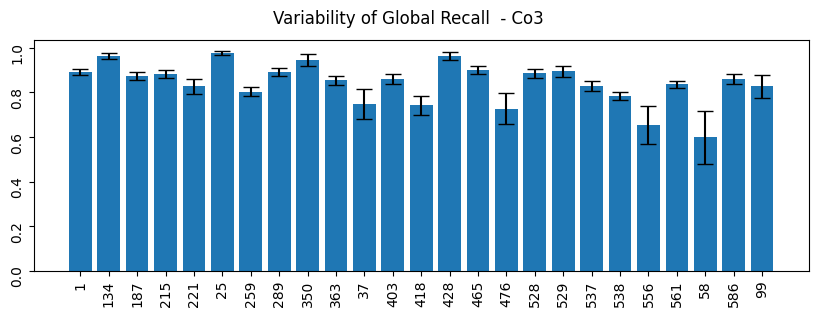

In [196]:
######### GLOBAL RECALL
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar(df_ave_data.columns, df_ave_data.mean(), yerr=df_ave_data.std(), capsize=6)

fig.suptitle('Variability of Global Recall  - '+ comb)

In [197]:
stats = df_ave_data.agg(['mean', 'count', 'std'])
stats

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.889848,0.962890,0.872912,0.881132,0.826842,0.97625,0.803376,0.889916,0.943103,0.853747,...,0.725773,0.886087,0.894152,0.828415,0.784629,0.654434,0.836364,0.598562,0.858287,0.827397
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.013382,0.012283,0.018364,0.018390,0.034702,0.01027,0.020147,0.017170,0.026987,0.021119,...,0.069769,0.019541,0.023519,0.021721,0.017342,0.083778,0.016366,0.118916,0.022917,0.050425


In [198]:
t = stats.transpose()
t.iloc[0]

mean     0.889848
count    5.000000
std      0.013382
Name: 1, dtype: float64

In [199]:
import math

ci95_hi = []
ci95_lo = []
#print(t)
for i in t.index:
    m, c, s = t.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo'] = ci95_lo
t['ci95_hi'] = ci95_hi


t.rename({'mean':'mean_gr', 'count': 'runs', 'std': 'std_gr', 'ci95_lo':'ci95_lo_gr', 'ci95_hi':  'ci95_hi_gr'}, axis='columns', inplace=True)


print (t.to_latex())


df_general['mean_gr'] = t['mean_gr']
df_general['std_gr'] = t['std_gr']
df_general['ci95_lo_gr']= t ['ci95_lo_gr']
df_general['ci95_hi_gr']=t['ci95_hi_gr']
df_general

\begin{tabular}{lrrrrr}
\toprule
{} &   mean\_gr &  runs &    std\_gr &  ci95\_lo\_gr &  ci95\_hi\_gr \\
\midrule
1   &  0.889848 &   5.0 &  0.013382 &    0.878118 &    0.901578 \\
134 &  0.962890 &   5.0 &  0.012283 &    0.952123 &    0.973656 \\
187 &  0.872912 &   5.0 &  0.018364 &    0.856816 &    0.889009 \\
215 &  0.881132 &   5.0 &  0.018390 &    0.865012 &    0.897252 \\
221 &  0.826842 &   5.0 &  0.034702 &    0.796425 &    0.857260 \\
25  &  0.976250 &   5.0 &  0.010270 &    0.967248 &    0.985252 \\
259 &  0.803376 &   5.0 &  0.020147 &    0.785716 &    0.821036 \\
289 &  0.889916 &   5.0 &  0.017170 &    0.874865 &    0.904967 \\
350 &  0.943103 &   5.0 &  0.026987 &    0.919448 &    0.966759 \\
363 &  0.853747 &   5.0 &  0.021119 &    0.835235 &    0.872259 \\
37  &  0.746624 &   5.0 &  0.066653 &    0.688200 &    0.805048 \\
403 &  0.857815 &   5.0 &  0.022460 &    0.838128 &    0.877502 \\
418 &  0.741259 &   5.0 &  0.040701 &    0.705583 &    0.776935 \\
428 &  0.962791

,runs,mean_prec,std_prec,ci95_lo_prec,ci95_hi_prec,mean_gr,std_gr,ci95_lo_gr,ci95_hi_gr
1,5.0,0.957306,0.009195,0.949246,0.965365,0.889848,0.013382,0.878118,0.901578
134,5.0,0.928000,0.027749,0.903677,0.952323,0.962890,0.012283,0.952123,0.973656
187,5.0,0.929800,0.028385,0.904920,0.954680,0.872912,0.018364,0.856816,0.889009
215,5.0,0.849600,0.045780,0.809472,0.889728,0.881132,0.018390,0.865012,0.897252
221,5.0,0.979200,0.020167,0.961523,0.996877,0.826842,0.034702,0.796425,0.857260
25,5.0,0.900800,0.039727,0.865978,0.935622,0.976250,0.010270,0.967248,0.985252
259,5.0,0.710944,0.067826,0.651492,0.770397,0.803376,0.020147,0.785716,0.821036
289,5.0,0.900600,0.055198,0.852217,0.948983,0.889916,0.017170,0.874865,0.904967
350,5.0,0.919233,0.041320,0.883015,0.955452,0.943103,0.026987,0.919448,0.966759
363,5.0,0.867000,0.024525,0.845502,0.888498,0.853747,0.021119,0.835235,0.872259


In [200]:
dir_path = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

df_ave_data = pd.DataFrame()

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
    for f in files:
        if "_meanJaccardIndex_all_run.txt" in f:
            #print(f)
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')

            # display DataFrame                                                    
            df_metric = df_metric.iloc[-1:]   ###### ------------> ya es poblacional, me quedo con la ultima gen
            #print(df_metric)          
            

            #df_ave_data = df_metric.copy()
            df_ave_data[t] = df_metric.mean(numeric_only=True, axis=0)     

#df_ave_data['average_p@10'] = df_ave_data.mean(numeric_only=True, axis=1)         

#total_average = df_ave_data['average_p@10'].mean()
#print("MEAN AVERAGE ", total_average)

df_ave_data

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.636651,0.805983,0.811588,0.738129,0.586175,0.967116,0.310826,0.617999,0.576929,0.841437,...,0.281944,0.834511,0.733969,0.836889,0.720009,0.163621,0.893503,0.243165,0.706629,0.677225
1,0.772715,0.909842,0.865648,0.653972,0.651421,0.975928,0.330418,0.847393,0.765724,0.850443,...,0.279936,0.792560,0.696814,0.748976,0.637697,0.520028,0.891798,0.211716,0.290813,0.695116
2,0.712446,0.891341,0.850867,0.693918,0.716372,0.978317,0.225233,0.864484,0.885332,0.805088,...,0.239071,0.783658,0.628226,0.856773,0.728309,0.154107,0.859481,0.447276,0.620468,0.705086
3,0.589538,0.911779,0.886548,0.558846,0.820278,0.966447,0.184104,0.806112,0.832476,0.772684,...,0.592618,0.811893,0.563283,0.539241,0.707744,0.129552,0.872808,0.242459,0.793266,0.381710
4,0.800506,0.911285,0.848090,0.737502,0.801901,0.924637,0.152787,0.840608,0.721318,0.853119,...,0.379536,0.828094,0.747203,0.828467,0.670479,0.234067,0.879183,0.458268,0.147513,0.719104


Text(0.5, 0.98, 'Variability of Jaccard Similarity Index  - Co3')

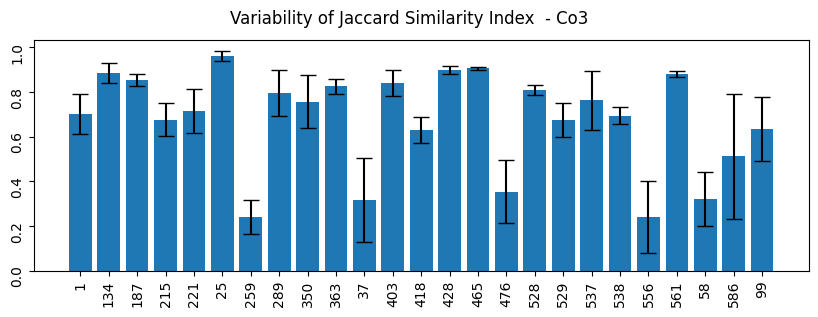

In [201]:
######### JACCARD
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar(df_ave_data.columns, df_ave_data.mean(), yerr=df_ave_data.std(), capsize=6)

fig.suptitle('Variability of Jaccard Similarity Index  - '+ comb)

In [202]:
stats = df_ave_data.agg(['mean', 'count', 'std'])
stats

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.702371,0.886046,0.852548,0.676473,0.715229,0.962489,0.240674,0.795319,0.756356,0.824554,...,0.354621,0.810143,0.673899,0.762069,0.692847,0.240275,0.879355,0.320577,0.511738,0.635648
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.089066,0.045562,0.027514,0.074453,0.099090,0.021800,0.077682,0.101372,0.118256,0.034787,...,0.142719,0.021964,0.077183,0.131148,0.037944,0.161137,0.014079,0.121406,0.278626,0.142773


In [203]:
t = stats.transpose()
t.iloc[0]


mean     0.702371
count    5.000000
std      0.089066
Name: 1, dtype: float64

In [204]:
import math

ci95_hi = []
ci95_lo = []
#print(t)
for i in t.index:
    m, c, s = t.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo'] = ci95_lo
t['ci95_hi'] = ci95_hi


t.rename({'mean':'mean_js', 'count': 'runs', 'std': 'std_js', 'ci95_lo':'ci95_lo_js', 'ci95_hi':  'ci95_hi_js'}, axis='columns', inplace=True)


print (t.to_latex())


df_general['mean_js'] = t['mean_js']
df_general['std_js'] = t['std_js']
df_general['ci95_lo_js']= t ['ci95_lo_js']
df_general['ci95_hi_js']=t['ci95_hi_js']

df_general['runs'] = df_general['runs'].astype(int)

print(df_general.to_latex())
df_general




\begin{tabular}{lrrrrr}
\toprule
{} &   mean\_js &  runs &    std\_js &  ci95\_lo\_js &  ci95\_hi\_js \\
\midrule
1   &  0.702371 &   5.0 &  0.089066 &    0.624302 &    0.780441 \\
134 &  0.886046 &   5.0 &  0.045562 &    0.846109 &    0.925983 \\
187 &  0.852548 &   5.0 &  0.027514 &    0.828431 &    0.876665 \\
215 &  0.676473 &   5.0 &  0.074453 &    0.611213 &    0.741734 \\
221 &  0.715229 &   5.0 &  0.099090 &    0.628374 &    0.802085 \\
25  &  0.962489 &   5.0 &  0.021800 &    0.943380 &    0.981597 \\
259 &  0.240674 &   5.0 &  0.077682 &    0.172582 &    0.308765 \\
289 &  0.795319 &   5.0 &  0.101372 &    0.706462 &    0.884176 \\
350 &  0.756356 &   5.0 &  0.118256 &    0.652699 &    0.860012 \\
363 &  0.824554 &   5.0 &  0.034787 &    0.794062 &    0.855047 \\
37  &  0.318769 &   5.0 &  0.187843 &    0.154117 &    0.483421 \\
403 &  0.839366 &   5.0 &  0.057578 &    0.788897 &    0.889835 \\
418 &  0.630785 &   5.0 &  0.059057 &    0.579019 &    0.682551 \\
428 &  0.898628

,runs,mean_prec,std_prec,ci95_lo_prec,ci95_hi_prec,mean_gr,std_gr,ci95_lo_gr,ci95_hi_gr,mean_js,std_js,ci95_lo_js,ci95_hi_js
1,5,0.957306,0.009195,0.949246,0.965365,0.889848,0.013382,0.878118,0.901578,0.702371,0.089066,0.624302,0.780441
134,5,0.928000,0.027749,0.903677,0.952323,0.962890,0.012283,0.952123,0.973656,0.886046,0.045562,0.846109,0.925983
187,5,0.929800,0.028385,0.904920,0.954680,0.872912,0.018364,0.856816,0.889009,0.852548,0.027514,0.828431,0.876665
215,5,0.849600,0.045780,0.809472,0.889728,0.881132,0.018390,0.865012,0.897252,0.676473,0.074453,0.611213,0.741734
221,5,0.979200,0.020167,0.961523,0.996877,0.826842,0.034702,0.796425,0.857260,0.715229,0.099090,0.628374,0.802085
25,5,0.900800,0.039727,0.865978,0.935622,0.976250,0.010270,0.967248,0.985252,0.962489,0.021800,0.943380,0.981597
259,5,0.710944,0.067826,0.651492,0.770397,0.803376,0.020147,0.785716,0.821036,0.240674,0.077682,0.172582,0.308765
289,5,0.900600,0.055198,0.852217,0.948983,0.889916,0.017170,0.874865,0.904967,0.795319,0.101372,0.706462,0.884176
350,5,0.919233,0.041320,0.883015,0.955452,0.943103,0.026987,0.919448,0.966759,0.756356,0.118256,0.652699,0.860012
363,5,0.867000,0.024525,0.845502,0.888498,0.853747,0.021119,0.835235,0.872259,0.824554,0.034787,0.794062,0.855047
